# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.0


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
Maior_Venda = df_dsa[['Cidade','Valor_Venda']].where(df_dsa['Categoria'] == 'Office Supplies').groupby('Cidade').sum().sort_values('Valor_Venda',ascending=False)

In [39]:
Maior_Venda.idxmax()

Valor_Venda    New York City
dtype: object

In [15]:
Maior_Venda.round(2).head(1)

,Valor_Venda
Cidade,
New York City,68362.81


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [52]:
Total_Vendas = df_dsa[['Valor_Venda','Data_Pedido']].groupby('Data_Pedido') ['Valor_Venda'].sum()

In [77]:
Total_Vendas2 = df_dsa[['Valor_Venda','Datas']].groupby('Datas') ['Valor_Venda'].sum().sort_index(ascending=True)

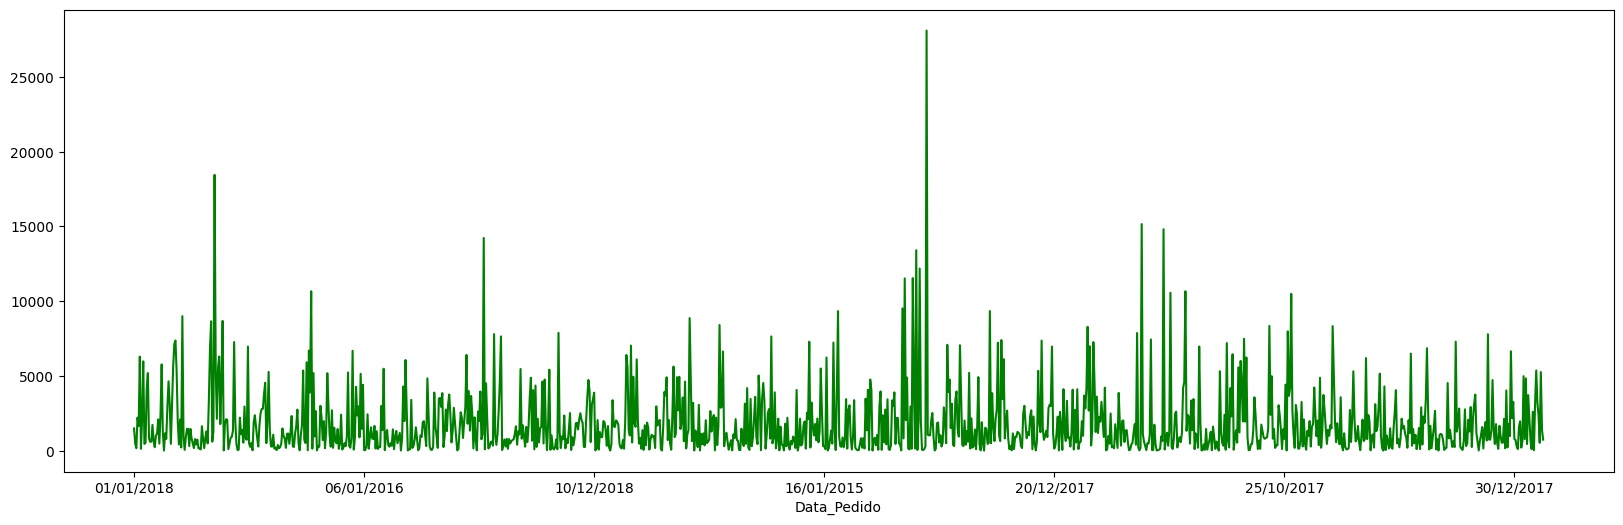

In [78]:
plt.figure(figsize=(20,6))
Total_Vendas.plot(x='Data_Pedido', y='Valor_Venda',color='green')
plt.show()
            

In [17]:
Vendas=Total_Vendas.Valor_Venda
Datas = Total_Vendas.index

Xticks = Datas[0:len(Datas):(len(Datas)//5)]

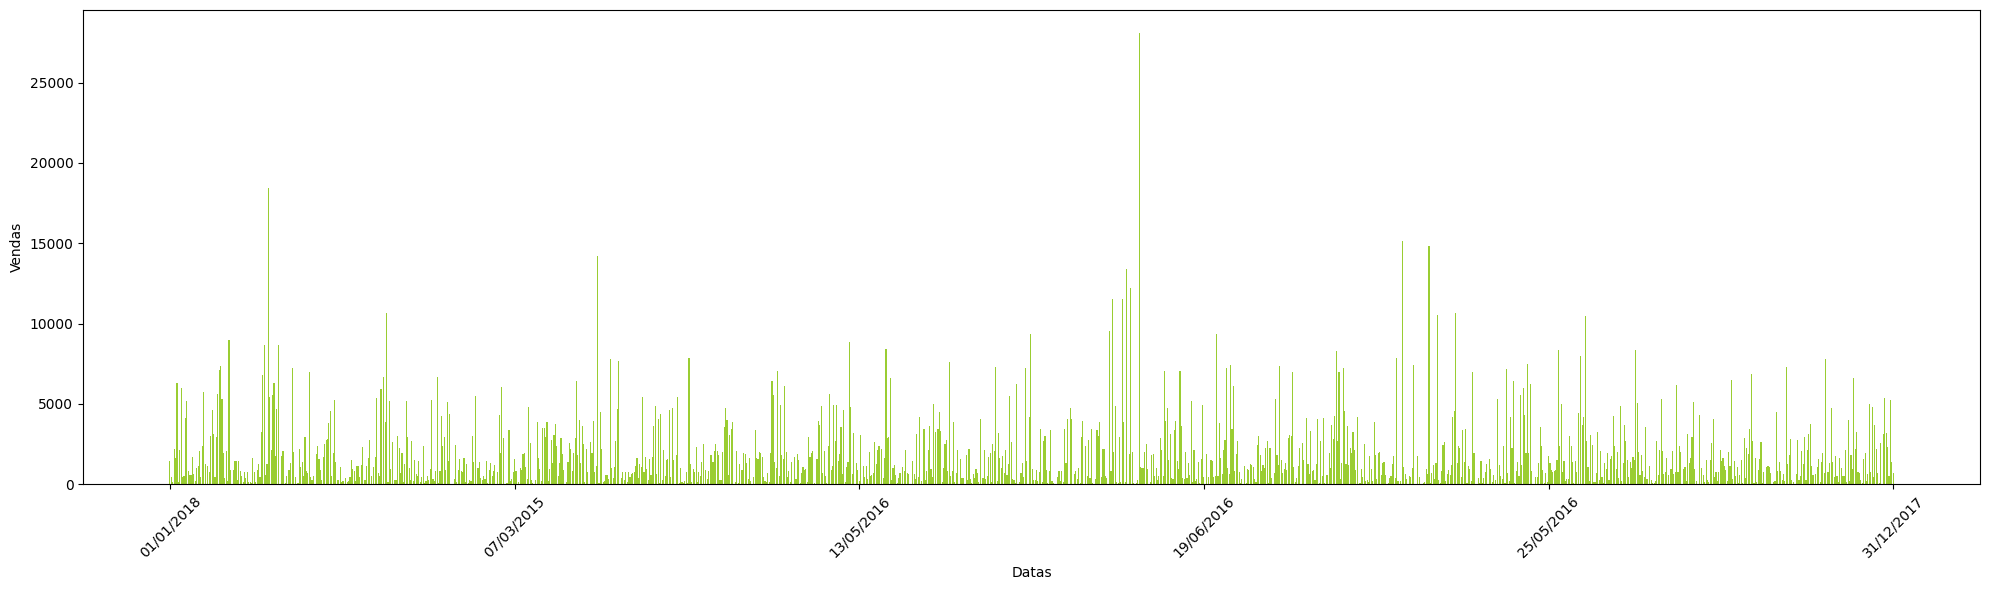

In [18]:
plt.figure(figsize=(20,6))
plt.bar(Datas,Vendas,color='yellowgreen')
plt.ylabel('Vendas')
plt.xlabel('Datas')
plt.xticks(ticks=Xticks,rotation=45)
plt.tight_layout()
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [19]:
Vendas_Estado =df_dsa[['Valor_Venda','Estado']].groupby('Estado').sum()

Estado = Vendas_Estado.index
Vendas_3 = Vendas_Estado.Valor_Venda

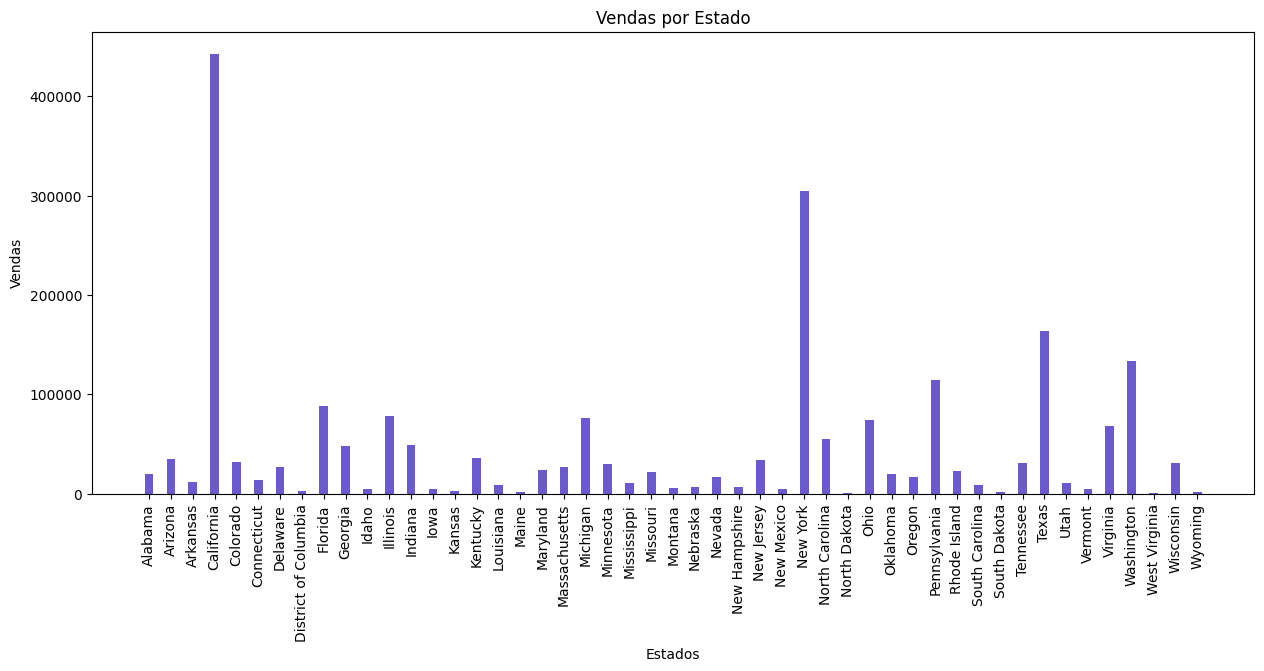

In [20]:
plt.figure(figsize=(15,6))
plt.bar(x=Estado,height=Vendas_3,width=0.4,color='slateblue')
plt.xlabel('Estados')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.title('Vendas por Estado')
plt.show()


## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [132]:
Vendas_Cidade = df_dsa[['Cidade','Valor_Venda','Estado']].groupby(['Cidade','Estado']).sum().sort_values(by='Valor_Venda',ascending=False).head(10)

Cidade_X = Vendas_Cidade.index
Cidade_Y = Vendas_Cidade.Valor_Venda

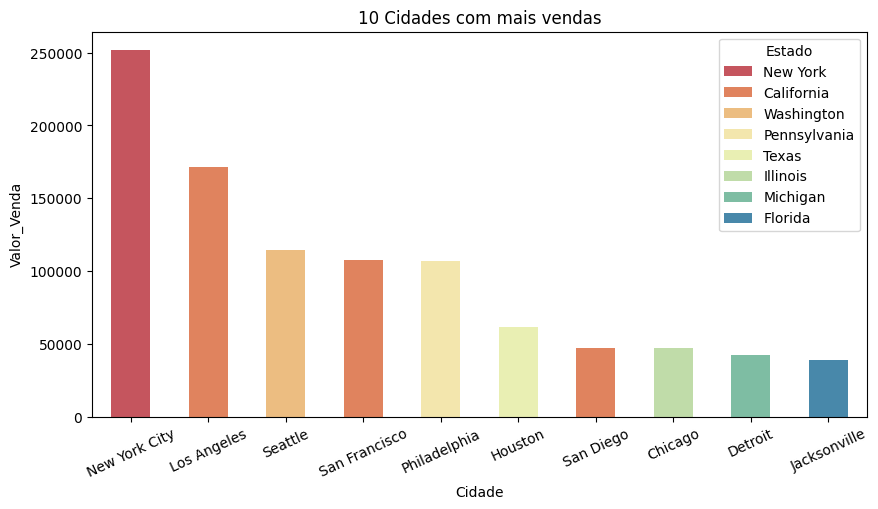

In [133]:
plt.figure(figsize=(10,5))
sns.barplot(data=Vendas_Cidade,
            x='Cidade',
            y='Valor_Venda',
            palette='Spectral',
            hue='Estado',
            width=0.5)
plt.xticks(rotation=25)
plt.title('10 Cidades com mais vendas')
plt.show()


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [23]:
Seg_Vendas = df_dsa[['Valor_Venda','Segmento']].groupby('Segmento').sum().sort_values(by='Valor_Venda',ascending=False)

lista = Seg_Vendas['Valor_Venda']

lista

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

In [134]:
def auto_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct+total/100))
        return '$ {v:d}'.format(v=val)
    return my_format
        

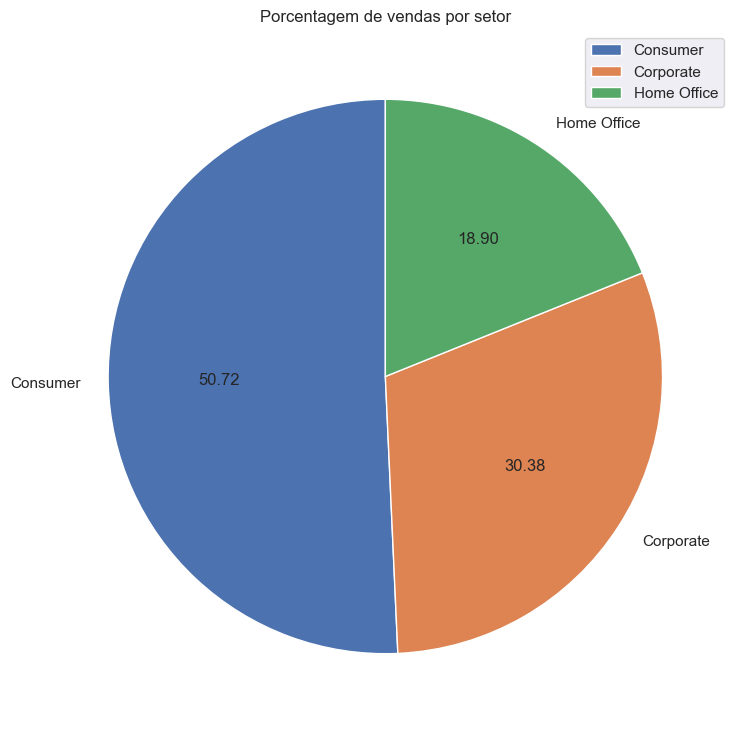

In [332]:
plt.figure(figsize=(16,9))
plt.pie(lista,labels=['Consumer','Corporate','Home Office'],autopct='%.2f',startangle=90)
plt.legend(loc='best')
plt.title('Porcentagem de vendas por setor')
plt.show()


## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [25]:
anos = (df_dsa['Data_Pedido']).str[-4:]

df_dsa['Ano'] = anos

In [181]:
df_dsa[['Valor_Venda','Ano','Segmento']].groupby(['Segmento','Ano']).sum('Valor_Venda').round(2)

Valor_Venda
Segmento    Ano              
Consumer    2015    256719.92
            2016    265295.26
            2017    288459.56
            2018    323359.60
Corporate   2015    125819.60
            2016    114643.12
            2017    203266.74
            2018    235502.73
Home Office 2015     88229.09
            2016     74134.13
            2017    103639.63
            2018    156488.58

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [27]:
Valores_Vendas = df_dsa['Valor_Venda']

df_dsa['15%'] = [round((x - (x * 0.15)), 2) if x > 1000 else 'Nan' for x in Valores_Vendas]
df_dsa['10%'] = [round((x - (x * 0.1)), 2) if x < 1000 else 'Nan' for x in Valores_Vendas]

df_dsa['15%'][df_dsa['15%'] != 'Nan'].count()

457

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [28]:
Media_Antes = round(df_dsa[df_dsa.Valor_Venda > 1000].Valor_Venda.mean(),2)
Media_Depois = round(df_dsa[df_dsa['15%'] != 'Nan']['15%'].mean(),2)

print(round(df_dsa[df_dsa['15%'] != 'Nan'].Valor_Venda.mean(),2))

print(round(df_dsa[df_dsa['15%'] != 'Nan']['15%'].mean(),2))

2116.81
1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [333]:
import warnings

In [336]:
df_dsa[['Valor_Venda','Ano','Segmento','Mes']].groupby(['Segmento','Ano','Mes']) ['Valor_Venda'].agg([np.mean,np.sum,np.median])

warnings.filterwarnings('ignore')

In [337]:
df_dsa[['Valor_Venda','Ano','Segmento','Mes']].groupby(['Ano','Mes','Segmento']).agg([np.mean,np.sum,np.median])

warnings.filterwarnings('ignore')

In [228]:
df_dsa['Mes'] = ((df_dsa['Data_Pedido']).str[-7:]).str[0:2]

Media_Mes_Ano = df_dsa[['Valor_Venda','Ano','Segmento','Mes']].groupby(['Ano','Mes','Segmento']).mean('Valor_Venda')



In [229]:
Media_Mes_Ano 

Valor_Venda
Ano  Mes Segmento                
2015 01  Consumer      146.736787
         Corporate     130.886769
         Home Office   329.855882
     02  Consumer      117.327926
         Corporate      69.235333
...                           ...
2018 11  Corporate     341.215278
         Home Office   247.519423
     12  Consumer      183.616244
         Corporate     153.167403
         Home Office   224.523983

[144 rows x 1 columns]

In [30]:
df_dsa_2015 = df_dsa[df_dsa['Ano'].astype(int) == 2015]
df_dsa_2016 = df_dsa[df_dsa['Ano'].astype(int) == 2016]
df_dsa_2017 = df_dsa[df_dsa['Ano'].astype(int) == 2017]
df_dsa_2018 = df_dsa[df_dsa['Ano'].astype(int) == 2018]

In [31]:
df_dsa['Ano'].unique()

array(['2017', '2016', '2015', '2018'], dtype=object)

<Figure size 1500x600 with 0 Axes>

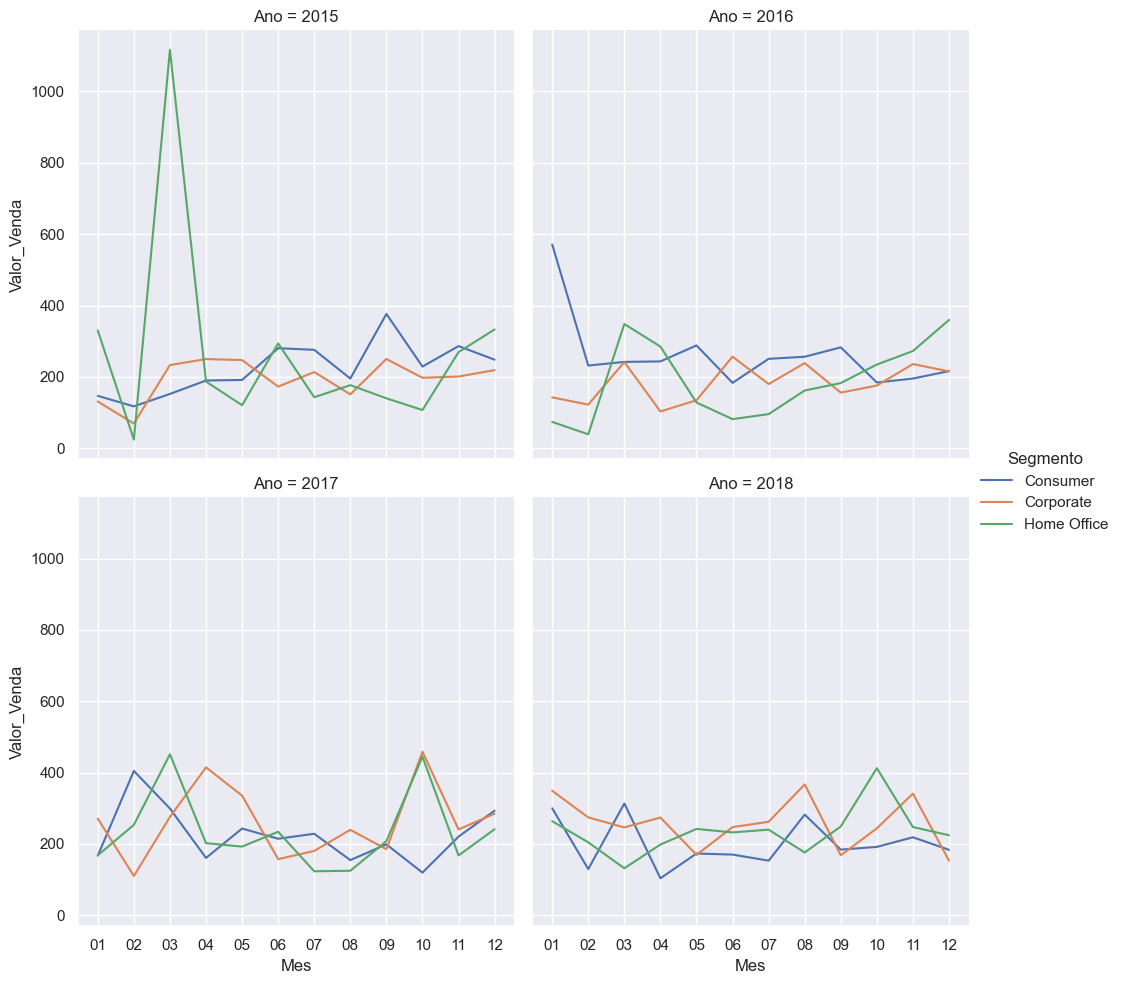

In [243]:
plt.figure(figsize=(15,6))
sns.set()
sns.relplot(data=Media_Mes_Ano,
            kind='line',
            x='Mes',
            y='Valor_Venda',
           col='Ano',
            hue='Segmento',
           col_wrap=2)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [288]:
Q10 = df_dsa[['SubCategoria','Categoria','Valor_Venda']].groupby(['SubCategoria','Categoria']).sum(numeric_only=True).sort_values('Valor_Venda',ascending=False).head(12)
Q10 = Q10.reset_index(['SubCategoria','Categoria'])
Q10['Valor_Venda'] = Q10['Valor_Venda'].astype(int)

In [289]:
Q10

,SubCategoria,Categoria,Valor_Venda
0,Phones,Technology,325271
1,Chairs,Furniture,317919
2,Storage,Office Supplies,216188
3,Tables,Furniture,202083
4,Binders,Office Supplies,194723
5,Machines,Technology,189238
6,Accessories,Technology,162791
7,Copiers,Technology,146248
8,Bookcases,Furniture,108045
9,Appliances,Office Supplies,104061


In [290]:
Q10_Pivot = Q10.pivot_table(index='SubCategoria',
                   columns='Categoria',
                   values='Valor_Venda',
                   aggfunc='sum',
                  margins=True,
                  margins_name='Grand Total')
Q10_Pivot['Grand Total'] = Q10_Pivot['Grand Total'].round()                
                

In [291]:
Q10_Pivot

Categoria,Furniture,Office Supplies,Technology,Grand Total
SubCategoria,,,,
Accessories,NaN,NaN,162791.0,162791
Appliances,NaN,104061.0,NaN,104061
Binders,NaN,194723.0,NaN,194723
Bookcases,108045.0,NaN,NaN,108045
Chairs,317919.0,NaN,NaN,317919
Copiers,NaN,NaN,146248.0,146248
Furnishings,88862.0,NaN,NaN,88862
Machines,NaN,NaN,189238.0,189238
Paper,NaN,76312.0,NaN,76312


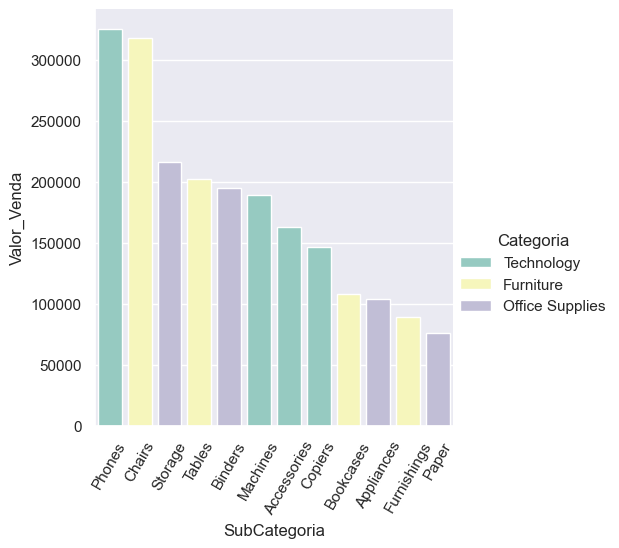

In [329]:
sns.catplot(data=Q10,kind='bar',
           x='SubCategoria',
           y='Valor_Venda',
           palette='Set3',
           hue='Categoria')
plt.xticks(rotation=60)
plt.show()


# Fim